In [1]:
pip install duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 1.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:

import duckdb
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
db_path = '/app/data/output.db'
con = duckdb.connect(database=db_path)


In [4]:
con.close()

In [10]:
con.sql("""
    show tables
""")

┌───────────────────┐
│       name        │
│      varchar      │
├───────────────────┤
│ star_schema_final │
└───────────────────┘

In [11]:
final_table = con.sql("""
    select * from star_schema_final;
""").df()


In [12]:
final_table

,year,county,bruto salary,count,civil servant
0,2021,Harju maakond,2141.054552,469,yes
1,2021,Hiiu maakond,1529.872591,52,yes
2,2021,Ida-Viru maakond,1838.234181,270,yes
3,2021,Järva maakond,1704.159241,97,yes
4,2021,Jõgeva maakond,1613.770054,107,yes
...,...,...,...,...,...
94,2023,Saare maakond,1395.000000,11544,no
95,2023,Tartu maakond,1837.000000,80781,no
96,2023,Valga maakond,1348.000000,8263,no
97,2023,Viljandi maakond,1515.000000,17541,no


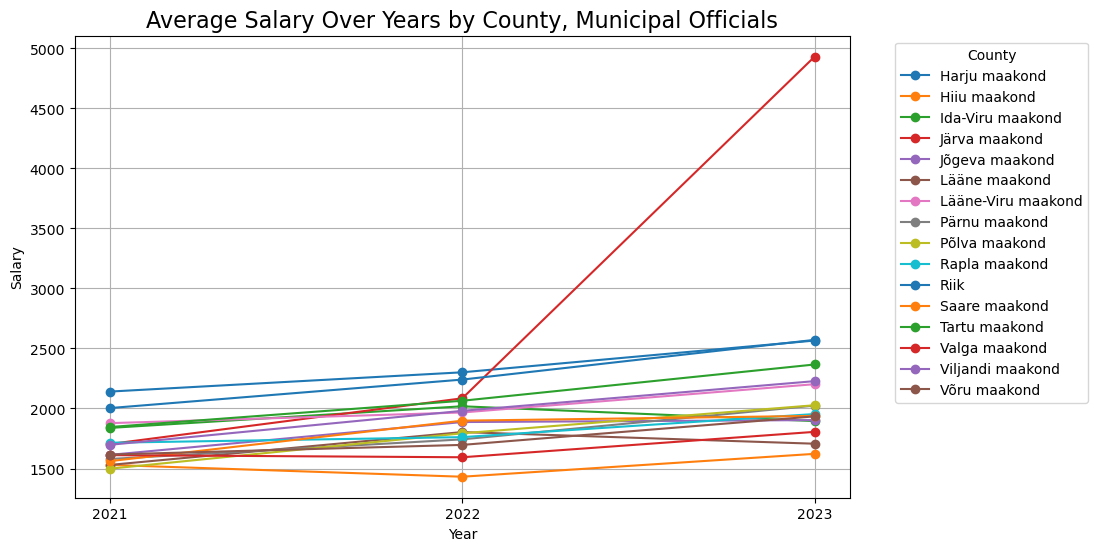

In [17]:
filtered_df = final_table[final_table['civil servant'] == 'yes']

# Create the plot
plt.figure(figsize=(10, 6))
for county in filtered_df['county'].unique():
    county_data = filtered_df[filtered_df['county'] == county]
    plt.plot(county_data['year'], county_data['bruto salary'], marker='o', label=county)

# Customize the plot
plt.title('Average Salary Over Years by County, Municipal Officials', fontsize=16)
plt.xlabel("Year")
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks([2021, 2022, 2023])
plt.ylabel("Salary")
plt.grid(True)
plt.show()

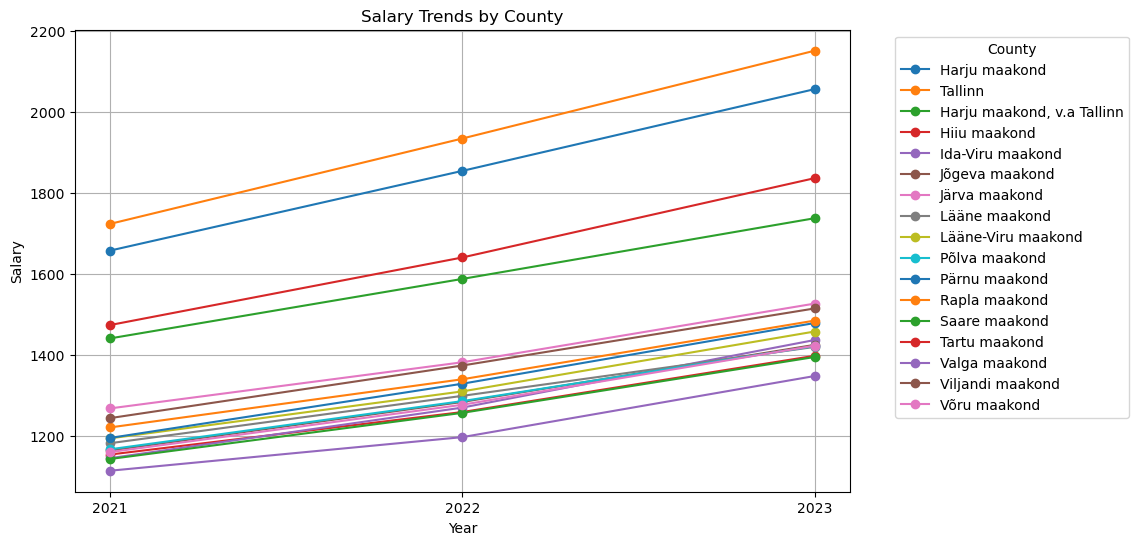

In [18]:
filtered_df = final_table[final_table['civil servant'] == 'no']

# Create the plot
plt.figure(figsize=(10, 6))
for county in filtered_df['county'].unique():
    county_data = filtered_df[filtered_df['county'] == county]
    plt.plot(county_data['year'], county_data['bruto salary'], marker='o', label=county)

# Customize the plot
plt.title("Salary Trends by County")
plt.xlabel("Year")
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks([2021, 2022, 2023])
plt.ylabel("Salary")
plt.grid(True)
plt.show()

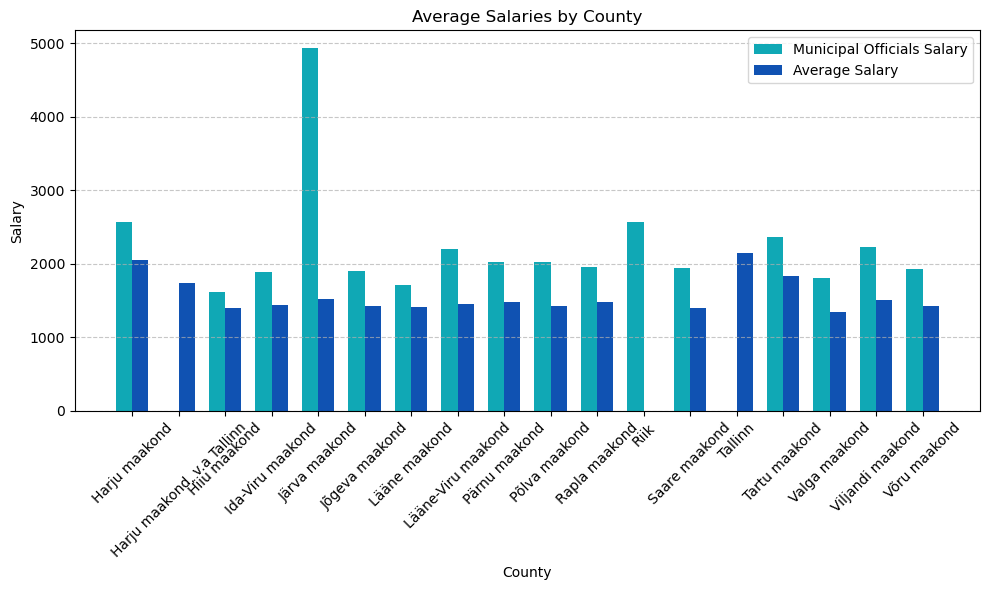

In [21]:
filtered_df = final_table[final_table['year'] == 2023]

# Pivot the data for easier plotting
pivot = filtered_df.pivot(index='county', columns='civil servant', values='bruto salary')

# Plotting
counties = pivot.index
x = np.arange(len(counties))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for each category of civil_servant
bars_yes = ax.bar(x - width/2, pivot['yes'], width, label='Municipal Officials Salary', color='#10a8b5')
bars_no = ax.bar(x + width/2, pivot['no'], width, label='Average Salary', color='#1052b2')

# Add labels, title, and legend
ax.set_xlabel('County')
ax.set_ylabel('Salary')
ax.set_title('Average Salaries by County')
ax.set_xticks(x)
ax.set_xticklabels(counties)
plt.xticks(rotation=45)
ax.legend()

# Customize the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()